Feature shape: (569, 30)
Target shape: (569,)
Classes: ['malignant' 'benign']

Accuracy on Test Data: 0.9824561403508771


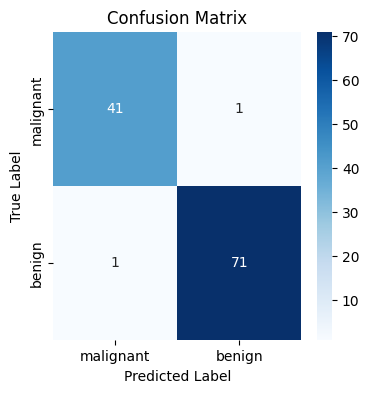


Classification Report:

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [1]:
# CODEALPHA - DISEASE PREDICTION (BREAST CANCER)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Classes:", data.target_names)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Build and train model
model = LogisticRegression(max_iter=5000)
model.fit(X_train_scaled, y_train)

# 5. Predictions
y_pred = model.predict(X_test_scaled)

# 6. Accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy on Test Data:", acc)

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 8. Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))
